# SEO Keyword Research Analysis

## Let's do some basic analysis of keywords related to our new Armada Alliance website


1. First we need to import the modules needed to build our db and run analysis
2. import the csv file with the keywords given by the google keyword planner
3. build a Pandas db
4. Analyze

In [41]:
#Importing packages
import os
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


pd.options.display.max_columns = 70
pd.options.display.max_rows = 99

In [42]:
df = pd.read_excel('seo_terms_batch1.xlsx', sheet_name='Keyword Stats 2021-06-22 at 11_')

In [43]:
df.shape[0]

3781

In [50]:
df1 = df.groupby(['Keyword', 'Avg. monthly searches','Competition']).size().unstack(fill_value=0)
df1

,Competition,High,Low,Medium,Unknown
Keyword,Avg. monthly searches,,,,
1 ada,50.0,0,1,0,0
100x coin price,500.0,0,1,0,0
1011a019,50.0,1,0,0,0
1011a169,50.0,1,0,0,0
2010 ada,500.0,0,1,0,0
...,...,...,...,...,...
zbg safemoon,5000.0,0,1,0,0
zcoin,5000.0,0,1,0,0
zcoin price,500.0,0,1,0,0


In [55]:
aboveEqual_five_thousand = df.loc[df['Avg. monthly searches'] >= 5000]
aboveEqual_fifty_thousand = df.loc[df['Avg. monthly searches'] >= 50000]
aboveEqual_fiveHundred_thousand = df.loc[df['Avg. monthly searches'] >= 500000]

In [56]:
num_rows5k = aboveEqual_five_thousand.shape[0]
num_rows5k

839

In [57]:
num_rows50k = aboveEqual_fifty_thousand.shape[0]
num_rows50k

110

In [58]:
num_rows500k = aboveEqual_fiveHundred_thousand.shape[0]
num_rows500k

11

In [59]:
frames = [aboveEqual_fiveHundred_thousand, aboveEqual_fifty_thousand]

#append dataframes
top_keywords = aboveEqual_fiveHundred_thousand.append(aboveEqual_fifty_thousand, ignore_index=True)
top_keywords = top_keywords.drop(labels=0, axis=0)
top_keywords

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jun 2020,Searches: Jul 2020,Searches: Aug 2020,Searches: Sep 2020,Searches: Oct 2020,Searches: Nov 2020,Searches: Dec 2020,Searches: Jan 2021,Searches: Feb 2021,Searches: Mar 2021,Searches: Apr 2021,Searches: May 2021,Concept: Retailer,Concept: Site,Concept: Website,Concept: Other Brands,Concept: Non-Brands,Concept: Financial Institution,Concept: Others,Concept: Exchange,Concept: Eletronics Brand
1,ada,USD,500000.0,Low,19.0,0.86,5.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,address,USD,500000.0,Low,4.0,0.23,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cryptocurrency,USD,500000.0,Low,30.0,1.65,10.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,crypto,USD,500000.0,Low,24.0,1.80,9.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN
5,binance us,USD,500000.0,Low,7.0,3.32,21.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,binance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,coins market,USD,50000.0,Low,3.0,2.05,14.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN
117,turning on airdrop,USD,50000.0,Low,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN
118,asics outlets,USD,50000.0,High,100.0,0.48,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asics,NaN,NaN,NaN,NaN,NaN
119,apple airdrops,USD,500000.0,High,100.0,0.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,apple,NaN,NaN


In [60]:
top_keywords.sort_values(by='Avg. monthly searches', ascending=False)

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jun 2020,Searches: Jul 2020,Searches: Aug 2020,Searches: Sep 2020,Searches: Oct 2020,Searches: Nov 2020,Searches: Dec 2020,Searches: Jan 2021,Searches: Feb 2021,Searches: Mar 2021,Searches: Apr 2021,Searches: May 2021,Concept: Retailer,Concept: Site,Concept: Website,Concept: Other Brands,Concept: Non-Brands,Concept: Financial Institution,Concept: Others,Concept: Exchange,Concept: Eletronics Brand
1,ada,USD,500000.0,Low,19.0,0.86,5.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,ada,USD,500000.0,Low,19.0,0.86,5.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,coincap market,USD,500000.0,Low,2.0,2.46,20.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coincap,NaN,NaN,NaN,NaN,NaN,NaN
2,address,USD,500000.0,Low,4.0,0.23,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,coinbase stocks,USD,500000.0,Low,3.0,1.66,16.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coinbase,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,asics gt 2000,USD,50000.0,High,100.0,0.48,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asics,NaN,NaN,NaN,NaN,NaN
46,asics gel nimbus,USD,50000.0,High,100.0,0.40,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asics,NaN,NaN,NaN,NaN,NaN
45,asics novablast,USD,50000.0,High,100.0,0.39,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asics,NaN,NaN,NaN,NaN,NaN
44,safe moon crypto,USD,50000.0,Low,29.0,2.55,21.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN


In [64]:
avg_monthly_searches = np.array(top_keywords['Avg. monthly searches']).reshape(-1,1)
competition_value = np.array(top_keywords['Competition (indexed value)']).reshape(-1,1)

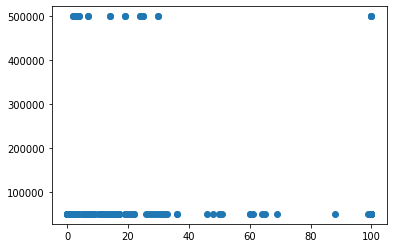

In [66]:
plt.scatter(competition_value, avg_monthly_searches)